In [8]:
from torchvision.io.image import read_image
from torchvision.models import segmentation

import matplotlib.pyplot as plt

img = read_image("test1.jpeg").float() / 255.0

# Step 1: Initialize model with the best available weights
model = segmentation.deeplabv3_resnet101(pretrained=True).eval()
model.eval()

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [13]:
output = model(img.unsqueeze(0))
print(output)

output = output['out']

OrderedDict([('out', tensor([[[[ 9.1264,  9.1264,  9.1264,  ...,  9.1111,  9.1111,  9.1111],
          [ 9.1264,  9.1264,  9.1264,  ...,  9.1111,  9.1111,  9.1111],
          [ 9.1264,  9.1264,  9.1264,  ...,  9.1111,  9.1111,  9.1111],
          ...,
          [ 9.7697,  9.7697,  9.7697,  ...,  9.7910,  9.7910,  9.7910],
          [ 9.7697,  9.7697,  9.7697,  ...,  9.7910,  9.7910,  9.7910],
          [ 9.7697,  9.7697,  9.7697,  ...,  9.7910,  9.7910,  9.7910]],

         [[-0.3432, -0.3432, -0.3432,  ..., -0.5698, -0.5698, -0.5698],
          [-0.3432, -0.3432, -0.3432,  ..., -0.5698, -0.5698, -0.5698],
          [-0.3432, -0.3432, -0.3432,  ..., -0.5698, -0.5698, -0.5698],
          ...,
          [-1.0344, -1.0344, -1.0344,  ..., -0.4825, -0.4825, -0.4825],
          [-1.0344, -1.0344, -1.0344,  ..., -0.4825, -0.4825, -0.4825],
          [-1.0344, -1.0344, -1.0344,  ..., -0.4825, -0.4825, -0.4825]],

         [[-1.0189, -1.0189, -1.0189,  ..., -0.9485, -0.9485, -0.9485],
         

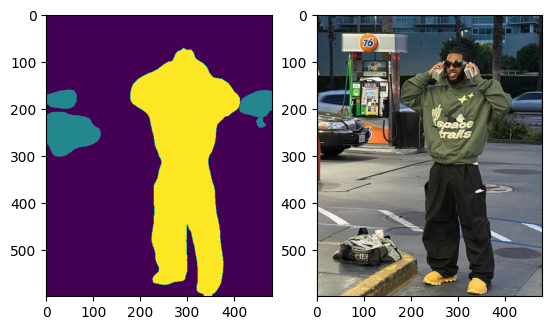

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(output.argmax(1).squeeze(0).detach().numpy())

plt.subplot(1, 2, 2)
plt.imshow(img.permute(1, 2, 0).detach().numpy())

plt.show()